# Multihilos vs Multiprocesos


In [13]:
import time
import threading
import multiprocessing

El problema que estoy ejecutando es la verificacion de números primos en un rango de números

In [14]:
# Función para verificar si un número es primo
def es_primo(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

## Secuencial

In [15]:
# Función que encuentra todos los primos hasta n
def encontrar_primos(n):
    primos = []
    for i in range(n):
        if es_primo(i):
            primos.append(i)
    return primos

# Definimos el rango máximo (número grande para notar la diferencia en el tiempo)
n = 10**6

inicio_secuencial = time.time()
primos_secuencial = encontrar_primos(n)
fin_secuencial = time.time()

tiempo_secuencial = fin_secuencial - inicio_secuencial

print(f"Tiempo Secuencial: {tiempo_secuencial} segundos")

Tiempo Secuencial: 2.8253750801086426 segundos


## Multihilos

In [16]:
# Función que encuentra los primos en un rango específico
def encontrar_primos_hilos(rango, primos_parciales, idx):
    primos_parciales[idx] = [i for i in rango if es_primo(i)]

# Número de hilos
num_hilos = 6
tamaño_bloque = n // num_hilos

# Almacenamos los resultados de cada hilo
primos_parciales_hilos = [[] for _ in range(num_hilos)]

# Creamos los hilos
hilos = []
inicio_hilos = time.time()
for i in range(num_hilos):
    inicio = i * tamaño_bloque
    fin = (i + 1) * tamaño_bloque
    hilo = threading.Thread(target=encontrar_primos_hilos, args=(range(inicio, fin), primos_parciales_hilos, i))
    hilos.append(hilo)
    hilo.start()

# Esperamos a que terminen todos los hilos
for hilo in hilos:
    hilo.join()

# Juntamos los resultados de todos los hilos
primos_total_hilos = sum(primos_parciales_hilos, [])
fin_hilos = time.time()

tiempo_hilo = fin_hilos - inicio_hilos

print(f"Tiempo con Multi-Hilos: {tiempo_hilo} segundos")

Tiempo con Multi-Hilos: 2.7521591186523438 segundos


## Multiprocesos

In [17]:
# Función que encuentra primos en un rango específico
def encontrar_primos_rango(rango):
    primos = [i for i in rango if es_primo(i)]
    print(f"Proceso: {multiprocessing.current_process().name}, Primos encontrados: {len(primos)}")

# Número de procesos
num_procesos = 4
tamaño_bloque = n // num_procesos

# Creamos los procesos
procesos = []
inicio_procesos = time.time()

for i in range(num_procesos):
    inicio = i * tamaño_bloque
    fin = (i + 1) * tamaño_bloque
    proceso = multiprocessing.Process(target=encontrar_primos_rango, args=(range(inicio, fin),))
    procesos.append(proceso)
    proceso.start()

# Esperamos a que todos los procesos terminen
for proceso in procesos:
    proceso.join()

fin_procesos = time.time()
tiempo_procesos = fin_procesos - inicio_procesos

print(f"Tiempo total con Multi-Procesos: {tiempo_procesos} segundos")

Tiempo total con Multi-Procesos: 0.1845560073852539 segundos


## Comparaciones

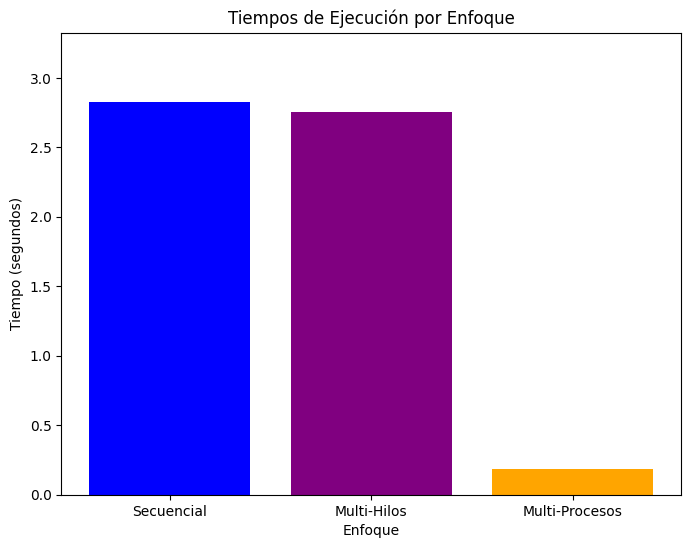

In [18]:
import matplotlib.pyplot as plt

# Datos de los tiempos
enfoques = ['Secuencial', 'Multi-Hilos', 'Multi-Procesos']
tiempos = [tiempo_secuencial, tiempo_hilo, tiempo_procesos]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(enfoques, tiempos, color=['blue', 'purple', 'orange'])
plt.title('Tiempos de Ejecución por Enfoque')
plt.xlabel('Enfoque')
plt.ylabel('Tiempo (segundos)')
plt.ylim(0, max(tiempos) + 0.5)

# Mostrar gráfico
plt.show()


## Conclusiones

Secuencial: Este es el enfoque más lento. Procesa todo de manera individual, sin dividir el trabajo ni aprovechar más de un núcleo de la CPU. Cada número es evaluado de manera lineal, lo que hace que el tiempo de ejecución sea más largo de lo que podría ser. Es sencillo deejecutar pero con grandes cantidades de datos, no es la opción más eficiente.

Multihilos: Este en enfoque en teoría, debería dividir la tarea en partes más pequeñas (con hilos), permitiendo que trabajen de manera concurrente, es decir, que los hilos hagan simultáneamente diferentes partes de la tarea, pero en Python, debido al Global Interpreter Lock (GIL), no pueden ejecutarse en diferentes núcleos para tareas que requieren mucho procesamiento, así que, aunque la concurrencia está ahí, no se traduce en un gran ahorro de tiempo, ya que al final solo un hilo puede estar ejecutando código Python a la vez. En la práctica, los hilos terminan siendo casi igual de lentos que la versión secuencial, con una mejora apenas perceptible.

Multiprocesos: Aquí es donde las cosas realmente mejoran. El enfoque de multi-procesos no está limitado por el GIL, lo que significa que puede usar múltiples núcleos de la CPU al mismo tiempo, donde cada proceso corre de manera independiente y en paralelo, dividiendo la tarea entre los núcleos disponibles. Esto hace que el tiempo de ejecución sea muchísimo más corto en comparación con los otros enfoques. Es la opción ganadora para este tipo de problemas intensivos en CPU, por lo menos en mi entorno de trabajo.

Por lo tanto, el secuencial es el más lento porque trabaja de forma lineal, sin aprovechar todos los recursos disponibles, multihilos aunque trabajan de manera concurrente, en Python están limitados por el GIL, lo que significa que no pueden ejecutarse en paralelo en múltiples núcleos y dar el poder de procesamiento necesaario a cada hilo, por lo que terminan siendo casi tan lentos como el enfoque secuencial y el enfoque multiprocesos es donde  cada proceso corre en un núcleo diferente de la CPU, lo que lo convierte en el enfoque más rápido con diferencia.

En resumen, multiprocesos es la mejor opción en Python, ya que logra aprovechar todos los núcleos y reduce significativamente el tiempo de ejecución.